## Visualization

This notebook contains some simple tests and visualizations of the dataset. It's part of the EDA process to get an understanding of the data.

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import load_data

In [69]:
# Load training data
X_train = load_data.load_images("MNIST_dataset/train-images-idx3-ubyte/train-images-idx3-ubyte")
y_train = load_data.load_labels("MNIST_dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte")

print("Train X shape:", X_train.shape)
print("Train y shape:", y_train.shape)
print("Sample shape:", X_train[0].shape)

Train X shape: (60000, 28, 28)
Train y shape: (60000,)
Sample shape: (28, 28)


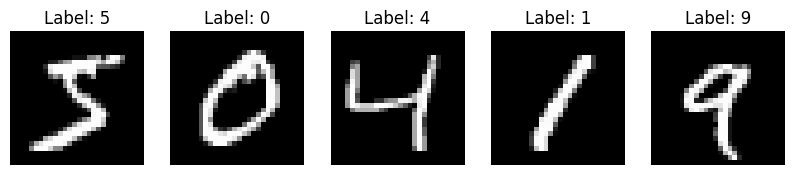

In [70]:
# Visualize some samples
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

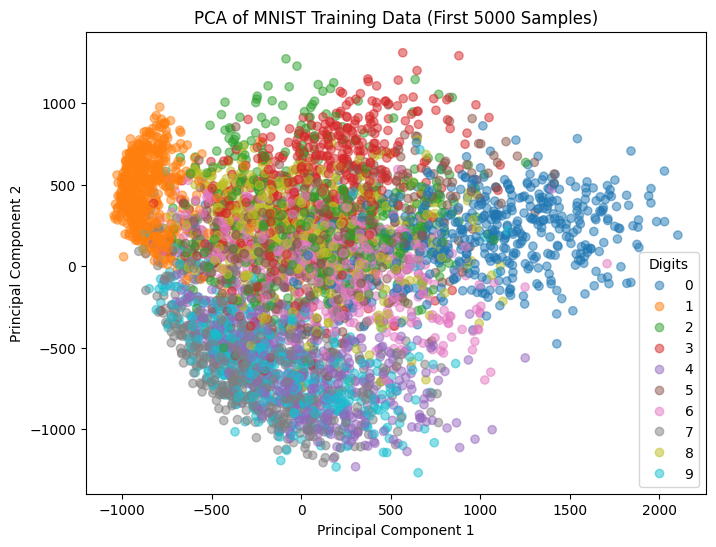

In [71]:
from sklearn.decomposition import PCA
# Flatten the images for PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_flat)

#only visualize the first 5000 samples for better clarity
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:5000, 0], X_train_pca[:5000, 1], c=y_train[:5000], cmap='tab10', alpha=0.5)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("PCA of MNIST Training Data (First 5000 Samples)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

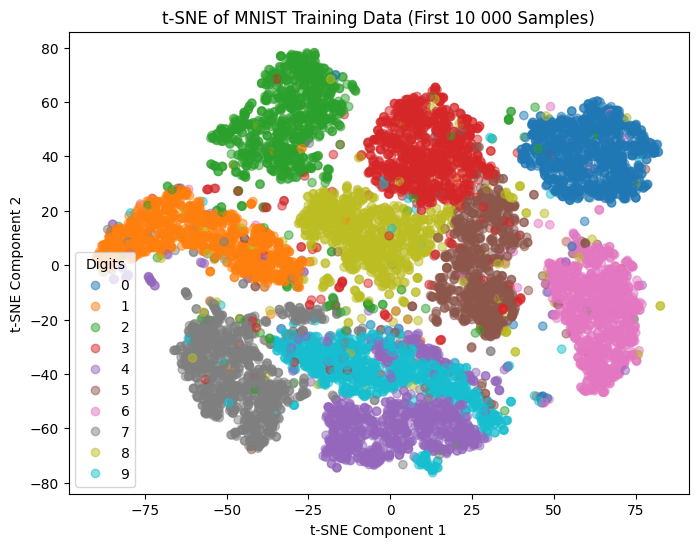

In [72]:
#t-SNE visualization
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_flat[:10000])  # Only visualize the first 10000 samples for better clarity

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train[:10000], cmap='tab10', alpha=0.5)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("t-SNE of MNIST Training Data (First 10 000 Samples)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

,Digit,Variance,Standard Deviation
0,0,0.120908,0.347718
1,1,0.059673,0.244282
2,2,0.106226,0.325923
3,3,0.101072,0.317919
4,4,0.088497,0.297484
5,5,0.092166,0.303588
6,6,0.099160,0.314897
7,7,0.085086,0.291696
8,8,0.105794,0.325260
9,9,0.089184,0.298638


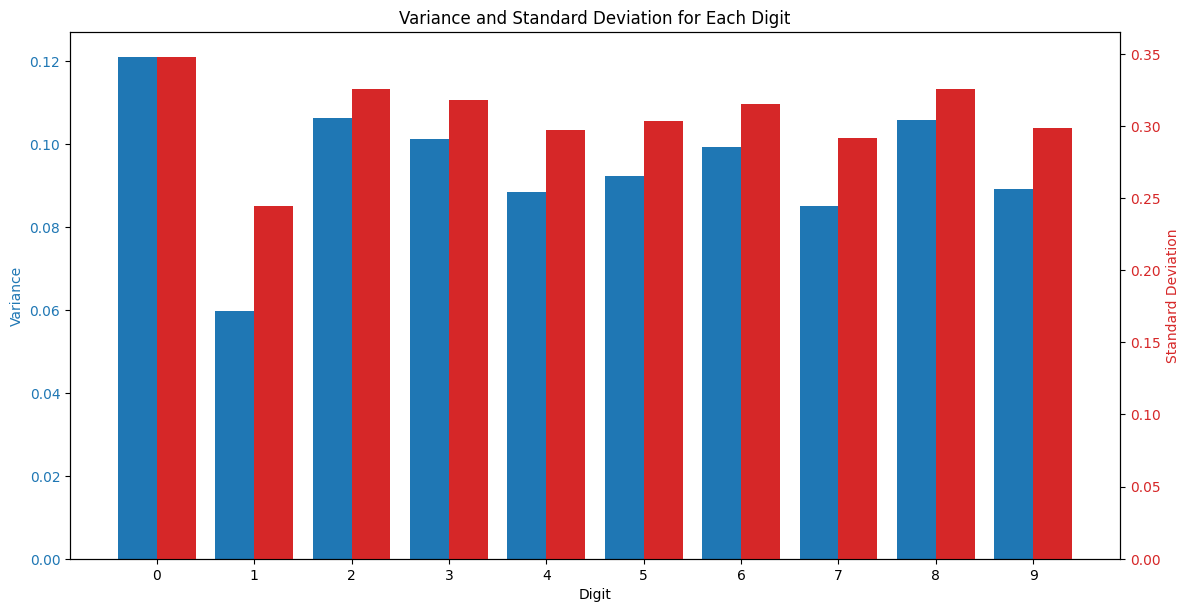

In [73]:
import calculations
import pandas as pd

X_train_normalized = X_train_flat / 255.0

# table of variation and standard deviation for each diget
var_stad_frame = pd.DataFrame({"Digit": np.arange(10)})
for i in range(10):
    var_stad_frame.loc[i, "Variance"] = calculations.variance(X_train_normalized[y_train == i])
    var_stad_frame.loc[i, "Standard Deviation"] = calculations.standard_deviation(X_train_normalized[y_train == i])

display(var_stad_frame)

#plotting the variance and standard deviation for each digit
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Digit')
ax1.set_ylabel('Variance', color=color)
ax1.bar(var_stad_frame["Digit"] - 0.2, var_stad_frame["Variance"], width=0.4, color=color, label='Variance')
ax1.set_xticks(var_stad_frame["Digit"])
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Standard Deviation', color=color)
ax2.bar(var_stad_frame["Digit"] + 0.2, var_stad_frame["Standard Deviation"], width=0.4, color=color, label='Standard Deviation')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title("Variance and Standard Deviation for Each Digit")
plt.show()

In [80]:
from calculations import outlier
#outliers for each digit
outliers_frame = pd.DataFrame({"Digit": np.arange(10)})
for i in range(10):
    outliers_frame.loc[i, "Outliers"] = outlier(X_train_normalized[y_train == i])
display(outliers_frame)

ImportError: cannot import name 'outlier' from 'calculations' (c:\Users\0404l\Documents\repos\MNIST-project-DT4031\calculations.py)